In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

### Confusion matrix

In [143]:
from itertools import product

def show_confusion_matrix(cm:np.ndarray, cmap:str="Greens", text_color:tuple=("black", "white")
                          , figsize:tuple=(12, 8), fontsize:int=12) -> None:
    """
    Confusion matrixの描画
    
    Parameters
    -----
    cm : array like(2-d)
        Confusion matrix
    cmap : str (default : 'Greens')
        cmap
    text_color : tuple of str (default : ('white', 'black'))
        text colors
    figsize : tuple of int (default : (12, 8))
        figsize of heat map of comfusion matrix 
    fontsize : int (default : 12)
        fontsize of text
    """
    if isinstance(cm, list):
        cm = np.array(cm)
    
    if cm.shape[0] == cm.shape[1]:
        n_class = cm.shape[0]
    else:
        raise ValueError(f"Invalid confusion matrix. shape : {cm.shape}")
    
    fig, ax = plt.subplots(figsize=figsize)

    im = ax.imshow(cm, cmap=cmap)
    th = im.norm(cm.max())/2
    for i, j in product(range(3), range(3)):
        color= text_color[int(im.norm(cm[i, j]) > th)]
        plt.text(j, i, str(cm[i, j])
             , horizontalalignment="center"
             , verticalalignment="center"
             , color=color
            , fontsize=fontsize
        )

    cbar = fig.colorbar(im)
    cbar.ax.set_ylabel("Frequency", rotation=-90, va="bottom", fontsize=fontsize)

    ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False)
    ax.xaxis.set_label_position("top")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([0, 1, 2])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels([0, 1, 2], fontsize=fontsize)
    ax.set_xlabel("Predict Label", fontsize=fontsize)
    ax.set_ylabel("True Label", fontsize=fontsize)
    fig.tight_layout()
    plt.show()
    plt.close()

[[36 28 46]
 [ 6 24 83]
 [88 31 93]]


In [145]:
n_class = 3

demo_data = np.random.randint(0, 100, size=(n_class, n_class))

cm = demo_data

show_confusion_matrix(cm)

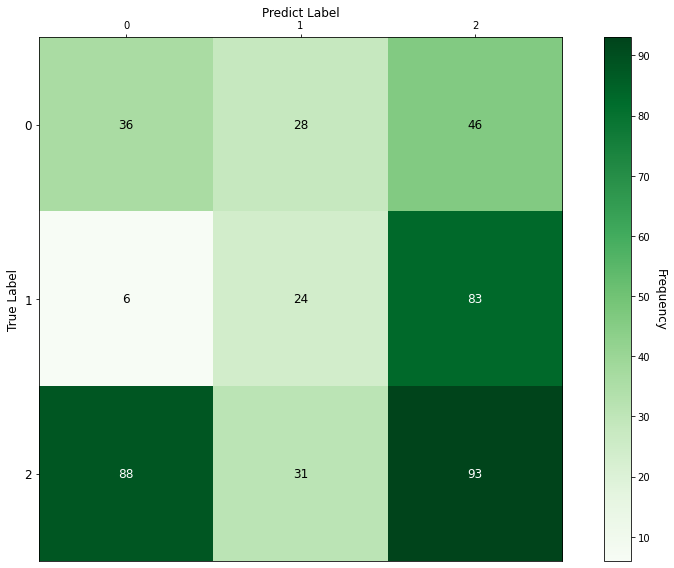